# Thompson Sampling

__UCB__ is a _deterministic_ algorithm, because it yields a single solution based on exploration. Alternatively, __Thompson Sampling__ is a _probabilistic_ (*stochastic*) algorithm because it is based off of a distribution of possible outcomes and will most likely provide a different solution every time it is run on the same dataset. One key benefit __Thompson Sampling__ has over __UCB__ is that it can also accomodate for delayed feedback. While __UCB__ has to update itself each step in order to possibly return different actions, Thompson Sampling already has a chance to return a different action without updating itself. 
<br>

Just like UCB, it is easier to prove Thompson Sampling by using an example. Let's start with 3 possible actions and their expected values:

<img src="threeBandits.png" width="600px;" alt="Expected Values (Least to Greatest): Blue, Green, Yellow" />
    
In the figure above, the return line consists of all of the return values from each action. The _blue_ action has the least expected value and the _yellow_ action has the highest expected value. Naturally, this information isn't known by the Thompson Sampling algorithm.

## Algorithm

1. Each action is explored a few times (or at least once), after which a _Beta Distribution_ can be created to represent a prediction of the expected value. A _Beta Distribution_ is most appropriately used to represent a distribution between two values, which is fitting when trying to map the distribution between probability of success and failure.

<img src="betaDistribution.png" style="width: 600px;" alt="Initial exploration." />

2. A random return value is chosen from each possible action's set of datapoints, based off of the _Beta Distribution._ The action associated with the maximum return value will be made. 

<img src="randomChosen.png" style="width: 600px;" alt="Random return value chosen from each action." />

<img src="maxChosen.png" style="width: 600px;" alt="Max value of all random return values chosen." />

3. The new datapoint is mapped to the action performed and _Bayesian Inferencing_ is performed, which updates a hypothesis based on new data. In the case of Thompson Sampling, _Bayesian Inferencing_ shifts the action's _Beta Distrubtion_ based on the value of the new datapoint. It also horizontally compresses the distribution due to a higher confidence.

<img src="newValue.png" style="width: 600px;" alt="New datapoint is mapped to the action made." />

<img src="bayesianInferencing.png" style="width: 600px;" alt="Bayesian Inferencing changes the action's distribution." />
                                                              
4. Steps 2 and 3 are repeated for the remaining number of iterations, the result of which are refined _Beta Distributions_.

<img src="finalState.png" style="width: 600px;" alt="Final state of each action's beta distributions." />

<hr>

## Code (Personally Implemented)

__NOTE:__ The current implementation of the Thompson Sampling algorithm only accounts for a success value of 1 and a failure value of 0. It doesn't account for partial successes and failures that may be represented as values between 0 and 1. 

__Importing Required Libraries:__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 'betavariate' chooses a random prior return value for each action, based on the action's Beta Distribution.
from random import betavariate

<hr>

__Variables:__

In [2]:
# Getting the total possible actions and number of iterations of the algorithm.
dataset = pd.read_csv('CTR_Optimization.csv')
total_actions = range(len(dataset.columns))
total_steps = dataset.index

# Keeps track of the # of failures associated with each action.
failures = [0] * len(total_actions)

# Keeps track of # of successes associated with each action.
successes = [0] * len(total_actions)

# Keeps track of which action was performed at each iteration.
actions_selected = []

# Keeps track of the total reward gained from using Thompson Sampling
total_reward = 0

__NOTE:__ Having a dataset isn't realistic for reinforcement learning algorithms. The algorithm not only bases itself off of previous results, but also uses these previous results to predict the next action to take. A dataset is simply convenient because it provides the various outcomes for choosing an action at each step. The algorithm still acts as though this information isn't already present and modifies itself interactively at each step. 

<hr>

__Thompson Sampling Algorithm:__

In [3]:
# Loop represents each iteration of the algorithm
for step in total_steps:
    # Keeps track of the action with the highest randomly chosen success/failure value.
    best_action = -1
    best_action_value = -1
    
    # Iterates through and receives a random return value from each action.
    for action in total_actions:
        action_value = betavariate(successes[action] + 1, failures[action] + 1)

        # If the random return value is the best return value, the action is considered to be the best action to take.
        if action_value > best_action_value:
            best_action_value = action_value
            best_action = action
    
    # The action selected is kept track of.
    actions_selected.append(best_action)

    # The success or failure is stored for the current action.
    response = dataset.values[step, best_action]
    if response == 1:
        successes[best_action] += 1
    else:
        failures[best_action] += 1
        
    # The 'total_reward' variable keeps track of all successes.
    total_reward += response

<hr>

__Printing Results:__

In [4]:
print('Total Reward: ' + str(total_reward))
print('Actions Taken: ' + str(actions_selected))

Total Reward: 2618
Actions Taken: [6, 0, 4, 8, 6, 3, 8, 7, 1, 4, 7, 3, 2, 0, 9, 5, 5, 4, 3, 1, 9, 3, 2, 6, 2, 6, 8, 4, 8, 1, 3, 9, 0, 6, 2, 5, 9, 9, 0, 4, 6, 5, 0, 1, 4, 8, 4, 2, 1, 1, 7, 4, 1, 1, 7, 7, 1, 8, 4, 6, 7, 2, 0, 1, 5, 9, 9, 4, 2, 7, 8, 7, 7, 8, 7, 3, 3, 9, 3, 2, 7, 5, 7, 2, 2, 4, 7, 4, 2, 2, 1, 3, 0, 8, 4, 2, 7, 4, 4, 4, 4, 7, 7, 2, 5, 7, 1, 4, 2, 2, 4, 7, 4, 3, 3, 4, 8, 4, 8, 4, 9, 7, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 0, 4, 4, 1, 4, 1, 1, 4, 4, 7, 4, 7, 1, 8, 5, 4, 4, 1, 8, 1, 3, 1, 4, 4, 1, 4, 2, 8, 4, 9, 1, 1, 8, 6, 8, 7, 7, 4, 2, 7, 4, 2, 1, 7, 3, 4, 8, 0, 4, 8, 4, 9, 9, 1, 4, 6, 4, 9, 1, 4, 8, 6, 4, 4, 6, 4, 8, 4, 4, 4, 4, 2, 1, 4, 5, 7, 7, 8, 1, 4, 4, 4, 4, 4, 4, 7, 4, 4, 2, 5, 7, 4, 7, 0, 1, 7, 7, 7, 7, 4, 8, 4, 4, 7, 6, 5, 0, 4, 4, 8, 4, 7, 0, 7, 4, 4, 4, 7, 7, 7, 7, 4, 2, 4, 4, 4, 7, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 7, 7, 4, 4, 7, 4, 4, 4, 4, 7, 4, 4, 4, 7, 4, 7, 4, 4, 4, 4, 4, 0, 4, 1, 4, 2, 4, 4, 4, 5, 4, 5, 4, 4, 4, 4,

<hr>

__Visualizing Results:__

Text(0, 0.5, 'Selection Count')

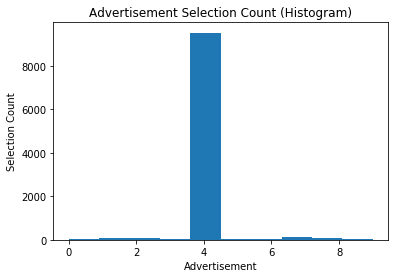

In [5]:
plt.hist(actions_selected)

# Labels are specific to the provided dataset.
plt.title('Advertisement Selection Count (Histogram)')
plt.xlabel('Advertisement')
plt.ylabel('Selection Count')

<hr>

__Results:__ Compared to the UCB algorithm, the Thompson Sampling algorithm figures out the best advertisement much faster. This helped it more than double the reward count produced from the randomizer.